Test slab_model.py
==================

Jinbo Wang

Jinbo.Wang@jpl.nasa.gov

last update: 12/31/2021

copied from full_wacm-scenario.ipynb

# WaCM was generated from the original

Highpass filtering and detides will be performed on the simulated WaCM data.

In [ ]:
import slab_model
import pylab as plt
import numpy as np
import xarray as xr
from popy import utils,mysignal
from scipy.io import loadmat
import pandas as pd
import pickle

xrod=xr.open_dataset

#use preprocess_mat2h5.ipynb to convert .mat files from Hong to HDF5
ss=['PaPa2','KEO2','NTAS2','Stratus2','WHOTS2']
station=ss[1]


### Plot the time series of the NIO energy of the five stations

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))

nio_ke=[]
low_ke=[]
high_ke=[]

for ss in ['PaPa2','KEO2','NTAS2','Stratus2','WHOTS2']:
    dd=slab_model.create_wacm_from_mooring(ss,)
    eke=(dd.u_truth_high_notide_nio**2+dd.u_truth_high_notide_nio**2)/2
    nio_ke.append(eke.mean().values**0.5)
    
    cc=eke.resample(time='10D').mean()**0.5
    cc.plot(ax=ax,lw=2,label=ss[:-1])
    
    eke=(dd.u_truth_low**2+dd.u_truth_low**2)/2
    low_ke.append(eke.mean().values**0.5)

    eke=(dd.u_truth_high**2+dd.u_truth_high**2)/2
    high_ke.append(eke.mean().values**0.5)
    
    del dd,eke
    
plt.grid(True,linestyle='--')
plt.legend()
    
plt.xlabel('Time')
plt.ylabel('m/s')
plt.tight_layout()
plt.savefig('figures/NIO_timeseries_five_stations.pdf')
plt.savefig('figures/NIO_timeseries_five_stations.png',dpi=300)

## Plot the energey budget at the five stations. 

[0.04994687747636646, 0.4755231600428138, 0.12128722373268458, 0.10402178704337955, 0.1298578187350453] [0.07644690532015395, 0.07426640006525251, 0.03153243843957349, 0.017401288944996905, 0.021492235028195753]


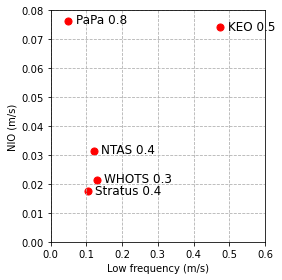

In [3]:

fig,ax=plt.subplots(figsize=(4,4))

print(low_ke,nio_ke)
cb=ax.scatter(low_ke,nio_ke,s=50,color='r')
for i,ss in enumerate(['PaPa2','KEO2','NTAS2','Stratus2','WHOTS2']):
    ax.text(low_ke[i]+0.02,nio_ke[i]-0.001,ss[:-1]+' %3.1f'%(nio_ke[i]/high_ke[i]),fontsize=12)
ax.set_xlim(0,0.6)
ax.set_ylim(0,0.08)
ax.set_xlabel('Low frequency (m/s)')
ax.set_ylabel('NIO (m/s)')
plt.grid(True,linestyle='--')
plt.tight_layout()
plt.savefig('figures/scatter_five_stations_ratios.pdf')
plt.savefig('figures/scatter_five_stations_ratios.pdf')